![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 11: Principal Component Analysis

### Filipa Peleja <filipa.peleja@bts.tech>
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech>

## Classical Data Analysis (11-03-2021)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_11/Session_11_Classical_Data_Analysis_PCA.ipynb)

**Resources (code patched and updated from):**
* Sklearn
* Aurelien Geron's O'Reilly's "Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow"

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Projection methods

UUID - #S11C1

Build 3D dataset:

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# PCA

UUID - #S11C2


Saving figure pca_best_projection_plot


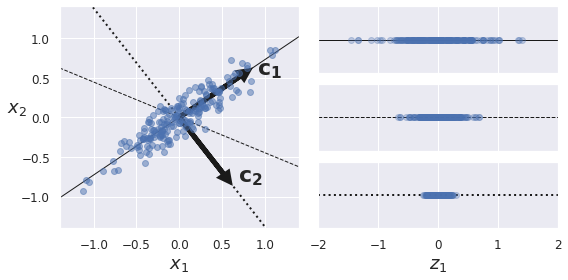

In [ ]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()

## PCA using SVD decomposition with numpy

UUID - #S11C3

### Rebuild the 3D Dataset

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

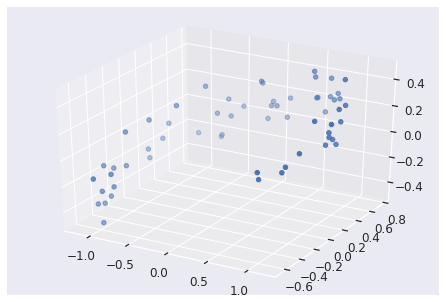

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [ ]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [ ]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [ ]:
i = Vt.T
i.shape

(3, 3)

In [ ]:
Vt.T

array([[ 0.93636116, -0.34027485, -0.08626012],
       [ 0.29854881,  0.90119108, -0.31420255],
       [ 0.18465208,  0.2684542 ,  0.94542898]])

In [ ]:
W2 = Vt.T[:, :2]
print(W2)
X2D = X_centered.dot(W2)

[[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]


In [ ]:
X2D_using_svd = X2D

In [ ]:
X2D_using_svd

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

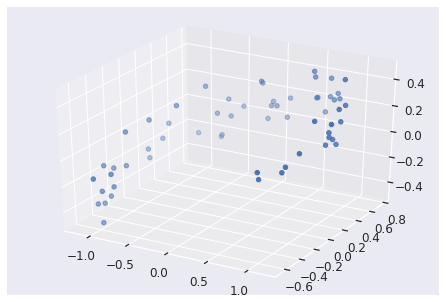

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

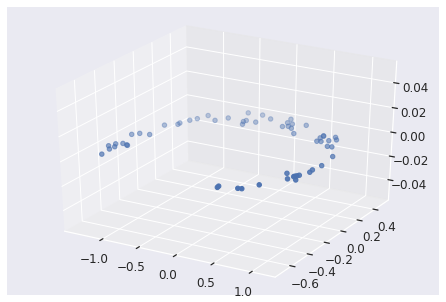

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X2D_using_svd[:, 0], X2D_using_svd[:, 1])
plt.show()

## PCA using Scikit-Learn

With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [ ]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [ ]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

Notice that running PCA multiple times on slightly different datasets may result in different results. In general the only difference is that some axes may be flipped. In this example, PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [ ]:
np.allclose(X2D, -X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

In [ ]:
np.allclose(X3D_inv, X)

False

We can compute the reconstruction error:

In [ ]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

The inverse transform in the SVD approach looks like this:

In [ ]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

The reconstructions from both methods are not identical because Scikit-Learn's `PCA` class automatically takes care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction:

In [ ]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

The `PCA` object gives access to the principal components that it computed:

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Select individual components

In [ ]:
pca.components_.T[:, 0]

array([-0.93636116, -0.29854881, -0.18465208])

Compare to the first two principal components computed using the SVD method:

In [ ]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

Notice how the axes are flipped.

Now let's look at the explained variance ratio:

In [ ]:
pca.explained_variance_ratio_

# Each dimension is an array of ortogonal vectors that capture the variance of the data

array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance:

In [ ]:
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

Here is how to compute the explained variance ratio using the SVD approach (recall that `s` is the diagonal of the matrix `S`):

In [ ]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

Next, let's generate some nice figures! :)

Utility class to draw 3D arrows (copied from http://stackoverflow.com/questions/11140163)

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Express the plane as a function of x and y.

In [ ]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

Plot the 3D dataset, the plane and the projections on that plane.

Saving figure dataset_3d_plot


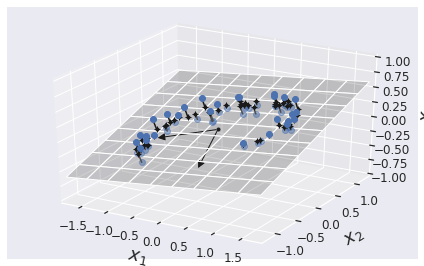

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# Note: If you are using Matplotlib 3.0.0, it has a bug and does not
# display 3D graphs properly.
# See https://github.com/matplotlib/matplotlib/issues/12239
# You should upgrade to a later version. If you cannot, then you can
# use the following workaround before displaying each 3D graph:
# for spine in ax.spines.values():
#     spine.set_visible(False)

save_fig("dataset_3d_plot")
plt.show()

Saving figure dataset_2d_plot


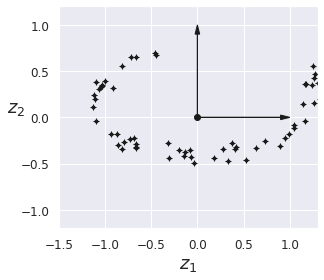

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

## EXERCISE 1: PCA's Sklearn and uncorrelated data [Optional]

First we will give an easy example of how to perform PCA and plot the eigenvectors or principal components

UUID - #S11E1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

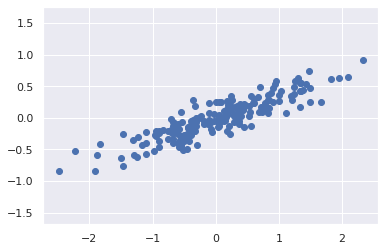

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


This code will plot the principal component vectors proportional to the sqrt of the explained variance. 

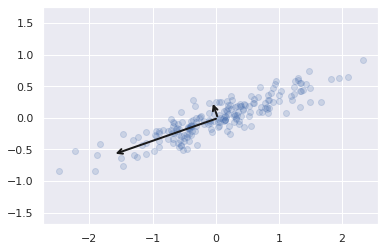

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Now try to perform a PCA over an uncorrelated dataset. Let us generate points within a circle, you can generate random angles between $0$ and $2\pi$ and random radius between $0$ and $R$. Then generate x and y coordinates as:

$$ x = R\ cos(\alpha)$$
$$ y = R\ sin(\alpha)$$

Generate 200 points.

In [ ]:
import math
np.random.seed(0)
X = np.zeros((200, 2))
R = 1
a = np.random.rand(200) * 2 * np.pi
r = np.random.rand(200)*R
X[:, 0] = np.cos(a) * r
X[:, 1] = np.sin(a) * r

Make a scatter plot of the generated data, would it be a good idea to perform a PCA on this dataset? Why? Remember that PCA tries to learn relations between variables

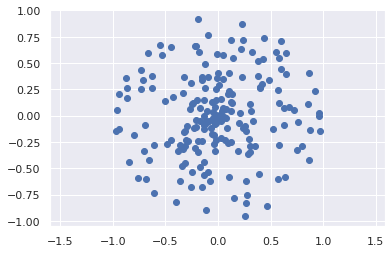

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Perform a PCA to the data, again with 2 components. Print the components and the explained variance. What can you tell about the results?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_

array([0.18377686, 0.14546711])

In [ ]:
pca.components_

array([[-0.95667578, -0.29115536],
       [ 0.29115536, -0.95667578]])

Plot again the data with the principal components

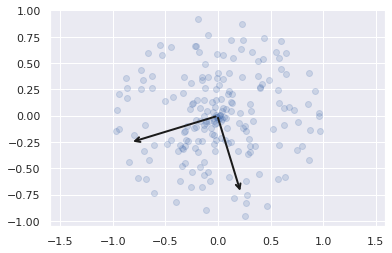

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Finding the right number of dimensions

UUID - #S11C4



### MNIST dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)


X_train (60000, 784)
Y_train (60000,)
X_test (10000, 784)
Y_test (10000,)


#### Using argmax

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Using a graph searching for the elbow

Saving figure explained_variance_plot


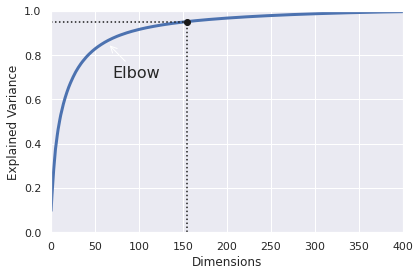

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

#### Setting n_components to 0.95

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

154

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.9501960192613033

## PCA for compression

UUID - #S11C5

In [ ]:
# Placing the number of components discovered before
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

### Utils: plot MNIST digits function

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure mnist_compression_plot


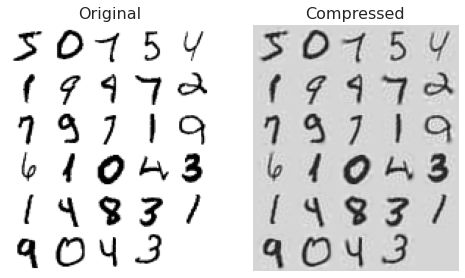

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [ ]:
X_reduced_pca = X_reduced

## PCA as feature selector

PCA can be used as a feature selector for datasets which have a large amount of features, possibly correlated. Images is an example where this happens often. Here we will take a look and explore a bit into that. We will be using the Labeled Faces in the Wild dataset made available through Scikit-Learn.

UUID - #S11C6

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

Print the target names

In [ ]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


Print the shape of the images, how many dimensions does each example have?

In [ ]:
print(faces.images.shape)

(1348, 62, 47)


In [ ]:
print(f'Num dimensions {62 * 47}')

Num dimensions 2914


Print the dataset description

In [ ]:
print(faces.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

Print the shape of the data. Is this in accordance with the shape of the images?

In [ ]:
print(faces.data.shape)

(1348, 2914)


Create a subplot with 3 rows and 5 columns, each plot should be an image that can be plotted with `axis.imshow()` and the title of the plots should be the target name.

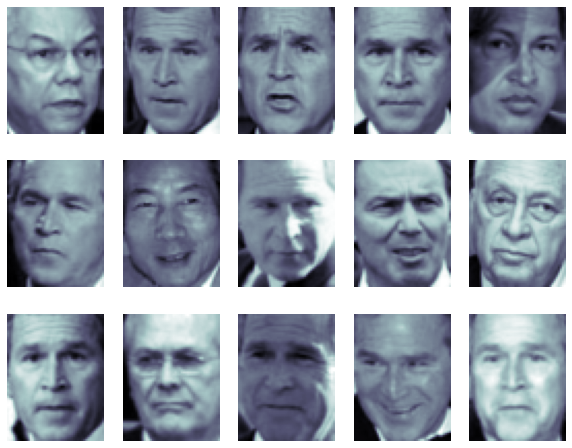

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(10,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xlabel=faces.target_names[faces.target[i]])
    axi.axis('off')

### The svd_solver parameter

UUID - #S11C7

Let's take a look at the principal axes that span this dataset. Because this is a large dataset, we will use PCA with the `svd_solver=randomized`. It will use a randomized method to approximate the first $N$ principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). Generate a PCA estimator with 150 components and fit it to the data. Use the library `time` to compute the number of seconds it needs to generate the 150 components and print the principal components.

In [ ]:
import time

t_start = time.time()
pca = PCA(200, svd_solver='randomized')
pca.fit(faces.data)
print(f'Finished with randmomized svd method in {time.time() - t_start} seconds')
pca.components_[:, 0]

Finished with randmomized svd method in 0.8792037963867188 seconds


array([-5.79701597e-03,  1.70836225e-02, -1.83366332e-02, -3.42530124e-02,
        8.62250943e-03, -7.24140042e-03, -1.85064021e-02,  1.51036419e-02,
       -4.02935594e-02, -5.38326846e-03, -1.54131986e-02, -7.42042437e-02,
       -2.84917839e-02,  8.41115788e-03, -2.31281966e-02,  1.43341543e-02,
        4.59708013e-02, -6.92107622e-03, -3.40739526e-02,  1.28032090e-02,
        3.71145196e-02,  6.70159701e-03, -8.39435216e-03,  2.80341692e-02,
        4.01635505e-02, -2.20975447e-02,  1.33674350e-02,  1.66216437e-02,
       -1.18482420e-02, -4.46538627e-02,  7.14093403e-05, -6.09888369e-03,
        2.75505800e-02, -2.02384801e-03, -4.41352883e-03, -2.42010001e-02,
        2.71752384e-02,  3.21202986e-02, -4.41534258e-03,  1.84095353e-02,
        1.79699715e-02,  3.07722911e-02, -6.88676396e-03, -1.75965466e-02,
        3.49961668e-02,  4.22219336e-02, -2.79722288e-02,  8.00153415e-04,
        3.02277245e-02, -1.87063850e-02, -1.68777332e-02,  6.37088791e-02,
        1.86784826e-02, -

Now use the full svd method. Also print the components and compare them with the previous ones. Are the results compatible?

In [ ]:
t_start = time.time()
pca = PCA(150, svd_solver='full')
pca.fit(faces.data)
print(f'Finished with full svd method in {time.time() - t_start} seconds')
pca.components_[:, 0]

Finished with full svd method in 2.702566385269165 seconds


array([-5.79706673e-03,  1.70835163e-02, -1.83366407e-02, -3.42529342e-02,
        8.62246566e-03, -7.24110752e-03, -1.85062550e-02,  1.51031520e-02,
       -4.02936339e-02, -5.38361212e-03, -1.54143386e-02, -7.42047131e-02,
       -2.84911655e-02,  8.41080304e-03, -2.31278073e-02,  1.43334065e-02,
        4.59709205e-02, -6.92057330e-03, -3.40745784e-02,  1.28025413e-02,
        3.71143892e-02,  6.70163007e-03, -8.39399733e-03,  2.80341730e-02,
        4.01641205e-02, -2.20973510e-02,  1.33673772e-02,  1.66215040e-02,
       -1.18483650e-02, -4.46544290e-02,  7.03692058e-05, -6.09850977e-03,
        2.75509395e-02, -2.02382705e-03, -4.41409508e-03, -2.42007803e-02,
        2.71750372e-02,  3.21204774e-02, -4.41399775e-03,  1.84103120e-02,
        1.79699808e-02,  3.07723396e-02, -6.88766968e-03, -1.75985266e-02,
        3.49953324e-02,  4.22229171e-02, -2.79719550e-02,  8.00167036e-04,
        3.02291829e-02, -1.87069830e-02, -1.68794896e-02,  6.37091249e-02,
        1.86793543e-02, -

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors," so these types of images are often called "eigenfaces"). Generate a subplot with 3 rows and 8 columns, might be better for visualization to set `figsize=(16, 8)`. For each subplot, show the image corresponding to the the ith principal component, reshaped to have the same dimensions as the input images.

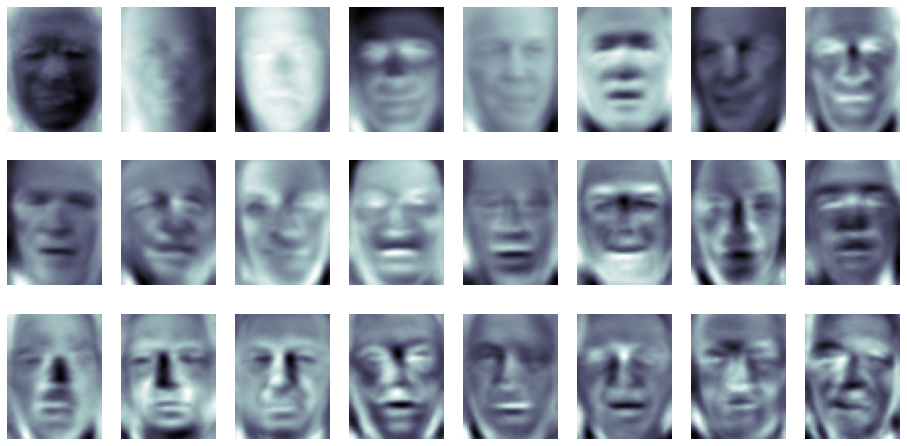

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap='bone')
    ax.axis('off')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving. You may compute the cumulative sum of the `explained_variance_ratio_` with `np.cumsum`. Make a plot of the curve. Do you think 150 components is enough? What do you think that might be a good criteria to stop? You may try to repeat the plot increasing the number of components.

In [ ]:
pca = PCA(n_components=.95, svd_solver='full')
faces_reduced = pca.fit_transform(faces.data)

In [ ]:
pca.n_components_

160

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.950246

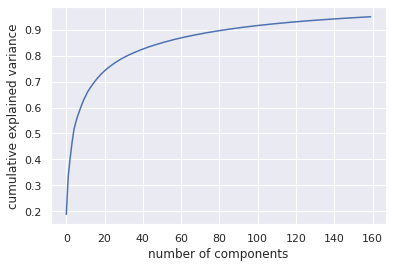

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Yes, I think 150 is enough components. We need 160 in order to reach an explained variance ratio of 95%, however, the elbow of explained variance ratoio curve turns significantly have approximately 80 components, at this point we have explained 90% of the variance and we need to add another 80 components just to gain another 5% of explained variance.

To conclude yes 150 is enough, however, this dataset is still relatively small so we could also go higher, but it wont capture much more information.

## EXERCISE 2: compression and feature selection of MNIST data

UUID - #S11E2

Following the examples above do a PCA over MNIST dataset following these rules:

* First try randomized and find the appropiate number of dimensions
* Once you have that, run a PCA with the full SVD mode
* Compress the dataset and reconstruct it
* Show the eigenvectors or the features for the MNIST dataset

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)


X_train (60000, 784)
Y_train (60000,)
X_test (10000, 784)
Y_test (10000,)


In [ ]:
# Randomized pca 

pca = PCA(n_components=200, svd_solver='randomized')
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > .95) + 1
d

154

In [ ]:
sum(pca.explained_variance_ratio_)

0.9660818365352893

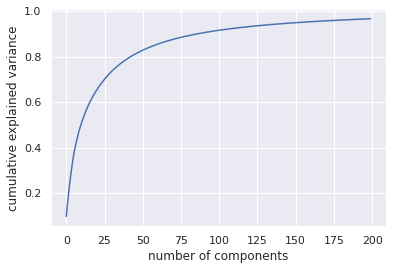

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# Full SVD

pca = PCA(n_components=.975, svd_solver='full')
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=0.975, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [ ]:
sum(pca.explained_variance_ratio_)

0.975070797060144

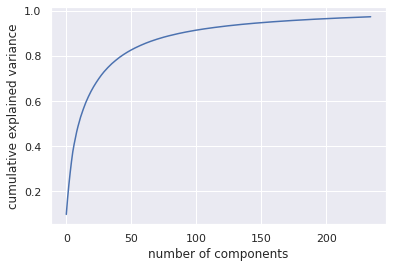

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Incremental PCA

UUID - #S11C8

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") 
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [ ]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

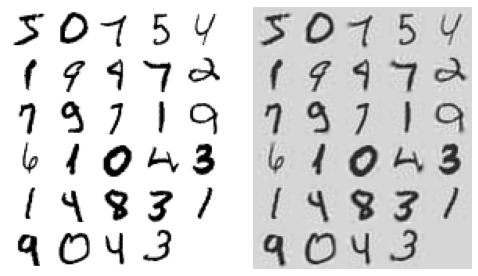

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [ ]:
X_reduced_inc_pca = X_reduced

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal: 

In [ ]:
np.allclose(pca.mean_, inc_pca.mean_)

True

But the results are not exactly identical. Incremental PCA gives a very good approximate solution, but it's not perfect:

In [ ]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

False

# EXERCISE 3: the limits of PCA

UUID - #S11E3

Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

The MNIST dataset was loaded earlier.

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)

X_train (60000, 784)
Y_train (60000,)
X_test (10000, 784)
Y_test (10000,)


*Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

t_start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, Y_train)
print(f'Training took {time.time() - t_start} seconds')

Training took 58.370882749557495 seconds


In [ ]:
y_pred = rnd_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, y_pred))

0.9705


*Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.*

In [ ]:
pca = PCA(n_components=200, svd_solver='randomized')
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > .95) + 1
d

154

In [ ]:
# Thus, lets use a pca with 254 components & now fit_transform
pca = PCA(n_components=154, svd_solver='randomized')
X_train_reduced = pca.fit_transform(X_train)


In [ ]:
X_train_reduced.shape

(60000, 154)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
Y_train.shape

(60000,)

*Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?*

In [ ]:
# Training with X_train_reduced

t_start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train_reduced, Y_train)
print(f'Training took {time.time() - t_start} seconds')

Training took 117.30595898628235 seconds


*Next evaluate the classifier on the test set: how does it compare to the previous classifier?*

In [ ]:
pca = PCA(n_components=154, svd_solver='randomized')
X_test_reduced = pca.fit_transform(X_test)

In [ ]:
y_pred = rnd_clf.predict(X_test_reduced)
print(accuracy_score(Y_test, y_pred))

# There is an issue here .... I shouldn't be fitting X_train and X_test for PCA separately I should do them in one ... will repeat below

0.1135


In [ ]:
# Lets try with just two PCA components

pca = PCA(n_components=2)
X_reduced_two = pca.fit_transform(X_train)

# Training with X_reduced_two

t_start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_reduced_two, Y_train)
print(f'Training took {time.time() - t_start} seconds')

Training took 12.97063398361206 seconds


In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))
print(X.shape)
print(Y.shape)

(70000, 28, 28)
(70000,)


In [ ]:
X = X.reshape(70000, 784)

In [ ]:
# Lets try again

pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = pca.fit_transform(X)
X_reduced.shape

(70000, 154)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

t_start = time.time()
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train, y_train)
print(f'Training took {time.time() - t_start} seconds')


y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Training took 53.35293173789978 seconds
0.9672857142857143


*Now try Logistic Regression over the original and the compressed dataset. Is it faster to train? What about the performance?*

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

print('X_train', X_train.shape)
print('Y_train', Y_train.shape)
print('X_test', X_test.shape)
print('Y_test', Y_test.shape)


from sklearn.linear_model import LogisticRegression

t_start = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(f'Training took {time.time() - t_start} seconds')

y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))


X_train (60000, 784)
Y_train (60000,)
X_test (10000, 784)
Y_test (10000,)
Training took 42.81065797805786 seconds
0.9255


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X = np.concatenate((X_train, X_test))
Y = np.concatenate((Y_train, Y_test))
print('X Shape', X.shape)
print('Y Shape', Y.shape)

X = X.reshape(70000, 784)

pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = pca.fit_transform(X)
print('X_reduced_shape', X_reduced.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


t_start = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(f'Training took {time.time() - t_start} seconds')


y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))

X Shape (70000, 28, 28)
Y Shape (70000,)
X_reduced_shape (70000, 154)
X_train (56000, 784)
y_train (56000,)
X_test (14000, 784)
y_test (14000,)
Training took 40.48735761642456 seconds
0.9178571428571428


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Manifold Learning

## Kernel PCA

UUID - #S11C9

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [ ]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

In [ ]:
print(grid_search.best_params_)

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

### Plotting the reduced dimensionality image

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.plot()

### Plotting the preimage

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_preimage[:, 0], X_preimage[:, 1], X_preimage[:, 2],c=t, cmap=plt.cm.hot)
plt.show()